# Predicting Heart Disease ML modelling

In this notebook we will be building a machine learning model using population data to predict heart disease risk.

To do:

* Use Pandas to import the csv data
* Use Label Encoder to convert categorical variables into numerical codes
* Shorten the total data to fit search parameters
* Undersample the model to make heart disease vs no heart disease equal
* Train Random forest model and logistic regression and compare their accuracies using confusion matrices and classification reports
* Save the most accurate model

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

import pickle

In [2]:
df = pd.read_csv("../resources/heart_2020_cleaned.csv", encoding = 'utf-8')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# First list all the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# List all the unique values for each column
for col in list(df):
    print(col)
    print(df[col].unique())

HeartDisease
['No' 'Yes']
BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
Skin

In [5]:
# Reduce the number of age categories to 3 and the number of diabetic categories to 2
age_cats = ["18 - 34", "35 - 64", "65 or older"]
df.replace({'AgeCategory' : {"18-24" : age_cats[0], 
                             "25-29" : age_cats[0],
                             "30-34" : age_cats[0],
                             "35-39" : age_cats[1],
                             "40-44" : age_cats[1],
                             "45-49" : age_cats[1],
                             "50-54" : age_cats[1],
                             "55-59" : age_cats[1],
                             "60-64" : age_cats[1],
                             "65-69" : age_cats[2],
                             "70-74" : age_cats[2],
                             "75-79" : age_cats[2],
                             "80 or older" : age_cats[2]}}, inplace = True)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,35 - 64,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,65 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65 or older,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,65 or older,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,35 - 64,White,No,Yes,Very good,8.0,No,No,No


## Use One Hot Encoding and LabelEncoder to encode the categorical variables

In [6]:
# Use LabelEncoder to encode the yes/no columns to 1/0
cat_columns = ["HeartDisease","Smoking", "AlcoholDrinking", "Stroke", 
               "DiffWalking", "PhysicalActivity", "Asthma",
               "KidneyDisease","SkinCancer", "Diabetic", "AgeCategory","Race","GenHealth", "Sex"]

le=LabelEncoder()

encoded_df = df.copy()

dict_all = dict(zip([], []))
 
for col in cat_columns:
    temp_keys = encoded_df[col].values
#     print(temp_keys)
    temp_values = le.fit_transform(encoded_df[col])
#     print(temp_values)
    dict_temp = dict(zip(temp_keys, temp_values))
#     print(dict_temp)
    dict_all[col] = dict_temp
#     print(dict_all[col])

# print(dict_all['HeartDisease'])

for col in cat_columns:
    encoded_df.replace(dict_all[col], inplace=True)

# encoded_df.replace(dict_all[col], inplace=True)
 
encoded_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,1,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,2,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,2,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,2,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,1,5,0,1,4,8.0,0,0,0


In [7]:
for col in cat_columns:
    le.fit(df[col])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(col)
    print(le_name_mapping)
    print("-------------")

HeartDisease
{'No': 0, 'Yes': 1}
-------------
Smoking
{'No': 0, 'Yes': 1}
-------------
AlcoholDrinking
{'No': 0, 'Yes': 1}
-------------
Stroke
{'No': 0, 'Yes': 1}
-------------
DiffWalking
{'No': 0, 'Yes': 1}
-------------
PhysicalActivity
{'No': 0, 'Yes': 1}
-------------
Asthma
{'No': 0, 'Yes': 1}
-------------
KidneyDisease
{'No': 0, 'Yes': 1}
-------------
SkinCancer
{'No': 0, 'Yes': 1}
-------------
Diabetic
{'No': 0, 'No, borderline diabetes': 1, 'Yes': 2, 'Yes (during pregnancy)': 3}
-------------
AgeCategory
{'18 - 34': 0, '35 - 64': 1, '65 or older': 2}
-------------
Race
{'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4, 'White': 5}
-------------
GenHealth
{'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}
-------------
Sex
{'Female': 0, 'Male': 1}
-------------


In [8]:
cat_columns = ["Sex", "AgeCategory", 
               "GenHealth", "Stroke", 
               "Diabetic", "KidneyDisease", 
               "Smoking", "AlcoholDrinking"]

# Shorten the dataframe as these will be the parameters we will be using in our predictor app
shortened = encoded_df[cat_columns]
shortened.head()

,Sex,AgeCategory,GenHealth,Stroke,Diabetic,KidneyDisease,Smoking,AlcoholDrinking
0,0,1,4,0,1,0,1,0
1,0,2,4,1,0,0,0,0
2,1,2,1,0,1,0,1,0
3,0,2,2,0,0,0,0,0
4,0,1,4,0,0,0,0,0


In [9]:
# Reformat the data into data and target
data = shortened
target = encoded_df.HeartDisease
target_names = ["No Heart Disease", "Yes Heart Disease"] # To use later

In [10]:
# Define X and y
X = data
y = target.values.reshape(-1,1)

y = y.ravel()

print(X.shape)
print(y.shape)

(319795, 8)
(319795,)


## Use correlation matrix to visualise how each parameter correlates with one another

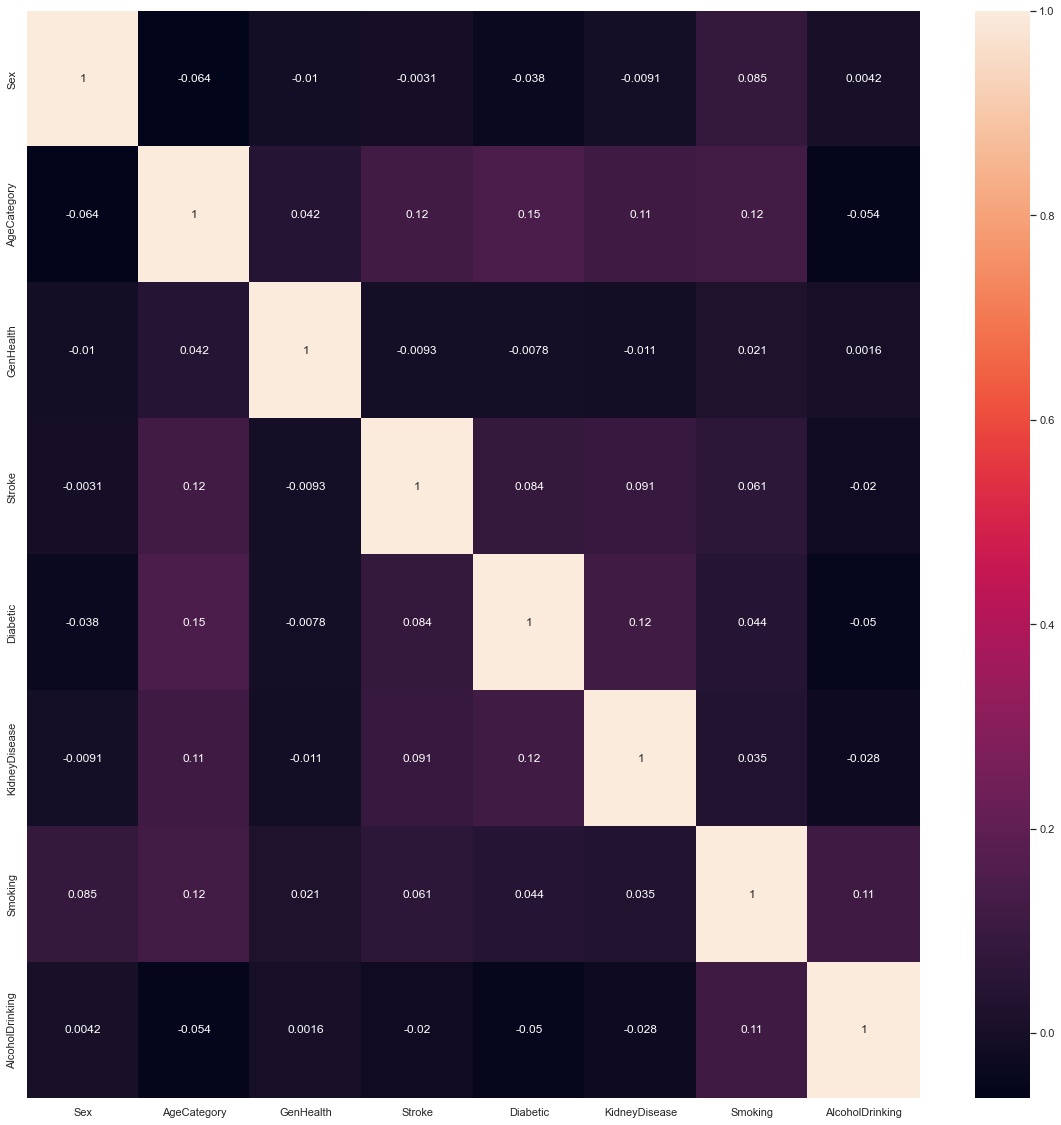

In [11]:
# Create Correlation matrix
corrMatrix = X.corr()

# Visualise the correlation matrix
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

As you can see from the correlation matrix, each parameter is not really correlated with the other, with the exception of the columns that were converted into dummy data (i.e., Age Category, Race, General Health), where each option is negatively correlated with the other options.

There are also too many features, so to reduce overfitting, we will use SelectKBest to select the top 20 features based on feature importance before modelling

## Use Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)
# stratify=y tells train_test_split to make sure that the training and test datasets 
# contain examples of each class in the same proportions as in the original dataset. 

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (239846, 8)
X test shape: (79949, 8)
y train shape: (239846,)
y test shape: (79949,)


## Scale the data using StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
# Transform the training and testing data to the scaler
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

## Use Random Undersampling to balance the data between heart disease sample and non heart disease sample

We do this because ~90% of the total data is classified as "No Heart Disease" and only ~10% is classified as "Yes Heart Disease". Since the original dataset is imbalanced, it is good practice to undersample the larger dataset to match the number of cases in the smaller dataset

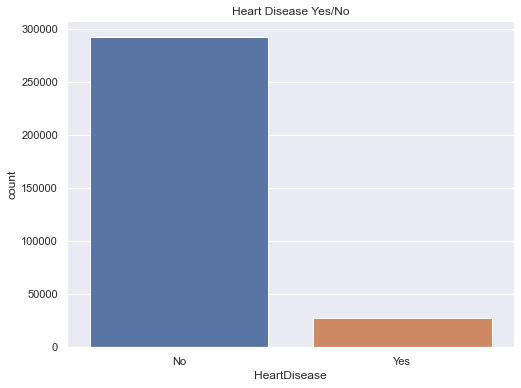

In [15]:
# Plot the distribution of heart disease using sns countplot
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(x="HeartDisease", data = df).set(title="Heart Disease Yes/No")
plt.show()

In [16]:
rus = RandomUnderSampler()
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)

## We don't resample the testing data
print(X_rus_train.shape)
print(y_rus_train.shape)

(41060, 8)
(41060,)


## Create Random Forest model using the target variable as "HeartDisease"

In [17]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

rf = rf.fit(X_rus_train, y_rus_train)

In [18]:
# Create predictions
rf_y_pred = rf.predict(X_test)

for x in range(0,10,1):
    print(f'Prediction: {rf_y_pred[x]}, Actual: {y_test[x]}')

Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1


In [19]:
# Score the training and testing data
print(f"Training Data Score: {rf.score(X_rus_train, y_rus_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.7589624939113493
Testing Data Score: 0.7145305132021664


<AxesSubplot:>

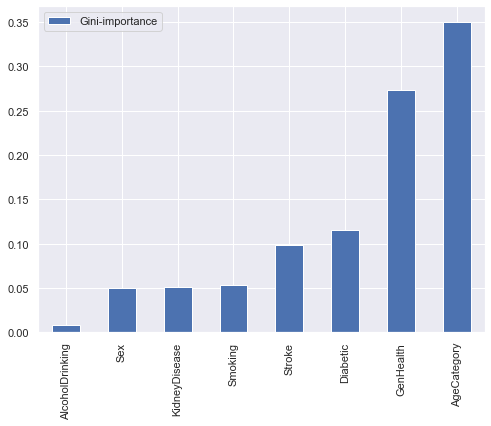

In [20]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)

[[51702 21404]
 [ 1419  5424]]


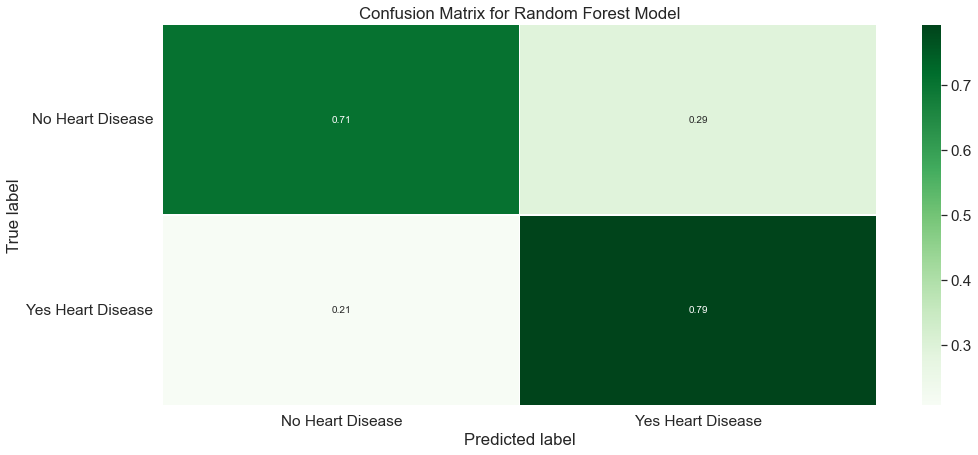

In [21]:
# confusion matrix
# Get and reshape confusion matrix data
# By default, sklearn.metrics.confusion_matrix(y_true,y_pred) create the matrix in the order the classes appear in y_true
matrix = confusion_matrix(y_test, rf_y_pred)
print(matrix)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
tick_marks = np.arange(len(target_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, target_names, rotation=0)
plt.yticks(tick_marks2, target_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [22]:
# Classification report
print(classification_report(y_test, rf_y_pred,
                            target_names=target_names))

                   precision    recall  f1-score   support

 No Heart Disease       0.97      0.71      0.82     73106
Yes Heart Disease       0.20      0.79      0.32      6843

         accuracy                           0.71     79949
        macro avg       0.59      0.75      0.57     79949
     weighted avg       0.91      0.71      0.78     79949



## Logistic Regression

In [23]:
lg = LogisticRegression(solver = "lbfgs", max_iter = 1000)

lg.fit(X_rus_train, y_rus_train)

LogisticRegression(max_iter=1000)

In [24]:
lg_y_pred = lg.predict(X_test)

for x in range(0,10,1):
    print(f'Prediction: {lg_y_pred[x]}, Actual: {y_test[x]}')

Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1


In [25]:
# Print the r2 score for the test data
print(f"Training Data Score: {lg.score(X_train, y_train)}")
print(f"Testing Data Score: {lg.score(X_test, y_test)}")

Training Data Score: 0.7348298491532066
Testing Data Score: 0.7311285944789804


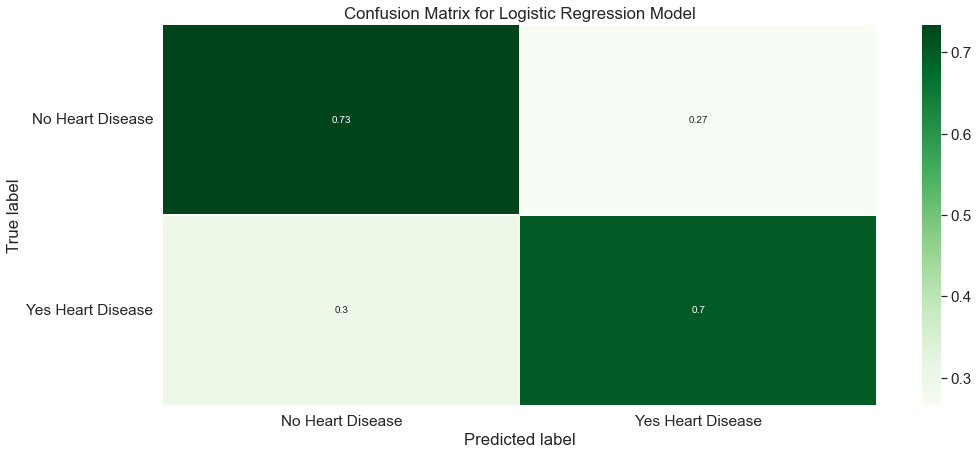

In [26]:
# confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, lg_y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
tick_marks = np.arange(len(target_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, target_names, rotation=0)
plt.yticks(tick_marks2, target_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [27]:
# Classification report
print(classification_report(y_test, lg_y_pred,
                            target_names=target_names))

                   precision    recall  f1-score   support

 No Heart Disease       0.96      0.73      0.83     73106
Yes Heart Disease       0.20      0.70      0.31      6843

         accuracy                           0.73     79949
        macro avg       0.58      0.72      0.57     79949
     weighted avg       0.90      0.73      0.79     79949



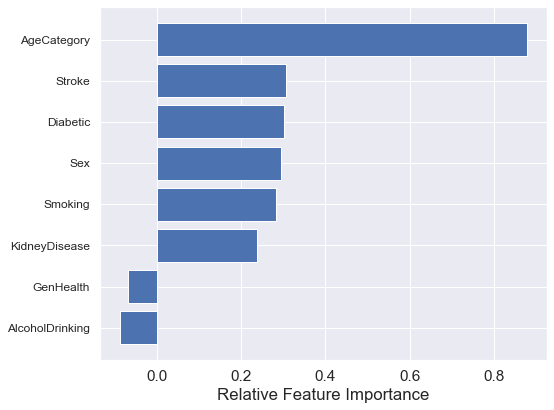

In [28]:
feature_importance = (lg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## Conclusion

Logistic regression model is performing with a higher accuracy, therefore we will save this model to use in our app.

In [29]:
# predict test
lg.predict(X_test[:1])

array([0], dtype=int64)

In [30]:
# save the models
filename = 'models/finalized_model.sav'
filename_le = 'models/label_encoder.sav'
filename_scaler = 'models/standard_scaler.sav'
filehandler = "models/dict_all.obj"

pickle.dump(lg, open(filename, 'wb'))
pickle.dump(le, open(filename_le, 'wb'))
pickle.dump(scaler, open(filename_scaler, 'wb'))
pickle.dump(dict_all, open(filehandler, 'wb'))


# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7311285944789804
